In [1]:
import os
import sys
import json
import warnings

import numpy as np

sys.path.insert(0, '/mnt/d/projects/bassline_transcription') 

import plotting as plot
from bassline_transcriber import transcription
from utilities import *
from signal_processing import *

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Initialization

## Directories

In [3]:
directories = get_directories('../data/directories.json')

scales, track_dicts, track_titles = read_metadata(directories['extraction'])

#output_dir = os.path.join('..','data','transcription_test')
#clip_dir = os.path.join(output_dir,'audio_clips')
#metadata_dir = os.path.join(output_dir,'metadata')

directories = get_directories(os.path.join(output_dir,'directories.json'))

scales, track_dicts, track_titles = read_metadata(directories['extraction'])

# Listening and Waveform Inspection

Select a track to work with

Andrea Oliva - Freaks (Solardo Acid Remix)
BPM: 128.0

		Andrea Oliva - Freaks (Solardo Acid Remix)

Chorus

Fs = 44100, x.shape = (330751,), x.dtype = float32


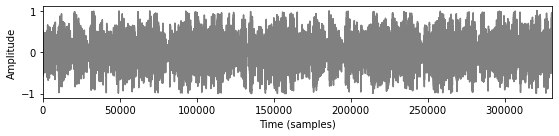

Bassline

Fs = 44100, x.shape = (330751,), x.dtype = float64


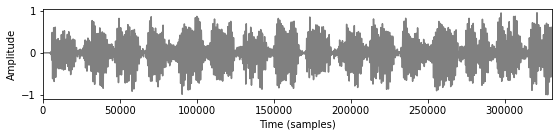

In [4]:
#title = track_titles[np.random.randint(len(track_titles))]

title = track_titles[2]
BPM = float(track_dicts[title]['BPM'])
beat_length = 60/BPM
print('{}\nBPM: {}\n'.format(title, BPM))

beat_positions = get_chorus_beat_positions(title, directories)
quarter_beat_positions = get_quarter_beat_positions(beat_positions)
    
track_scale = get_track_scale(title, track_dicts, scales)

fs = 44100
chorus, bassline = load_chorus_and_bassline(title, directories) # read the chorus and the bassline

inspect_audio_outputs(title, directories)

beat_length = 60/BPM
print('Beat length: {}'.format(beat_length))

track_length = len(chorus)/fs
print('Track length: {}'.format(track_length))

print(track_length/beat_length)

frame_factor = 8
frame_size = beat_length/frame_factor
window_size = frame_size/2
hop_size = frame_size/4

pYIN_sizes_sec = [frame_size, window_size, hop_size]
pYIN_sizes = [int(x*fs) for x in  pYIN_sizes_sec]
print('\nframe_size: {}, window_size: {}, hop_size: {}'.format(*pYIN_sizes))
print('in sec: {}, {}, {}'.format(*pYIN_sizes_sec))

# Transcription Inspection

Load all the system outputs

In [8]:
print(title)

F0_estimate = load_F0_estimate(title, directories)

pitch_track = load_pitch_track(title, directories)

quantized_pitch_track = load_quantized_pitch_track(title, directories)

M=1
bassline_midi = load_bassline_midi_array(title, directories, M)

symbolic_representation = load_symbolic_representation(title, directories, M)

midi_number = transcription.unpack_repetitions(symbolic_representation)

Andrea Oliva - Freaks (Solardo Acid Remix)


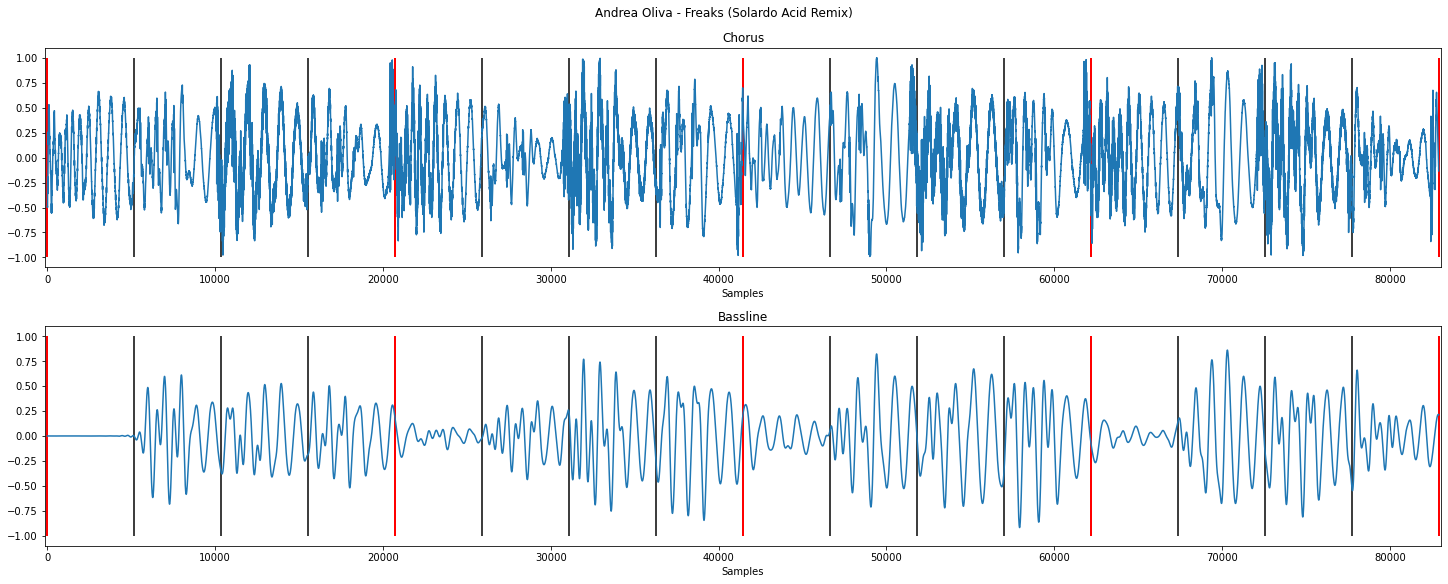

In [9]:
plot.chorus_bassline_stem(title, chorus, bassline, beat_positions, 4, fs)

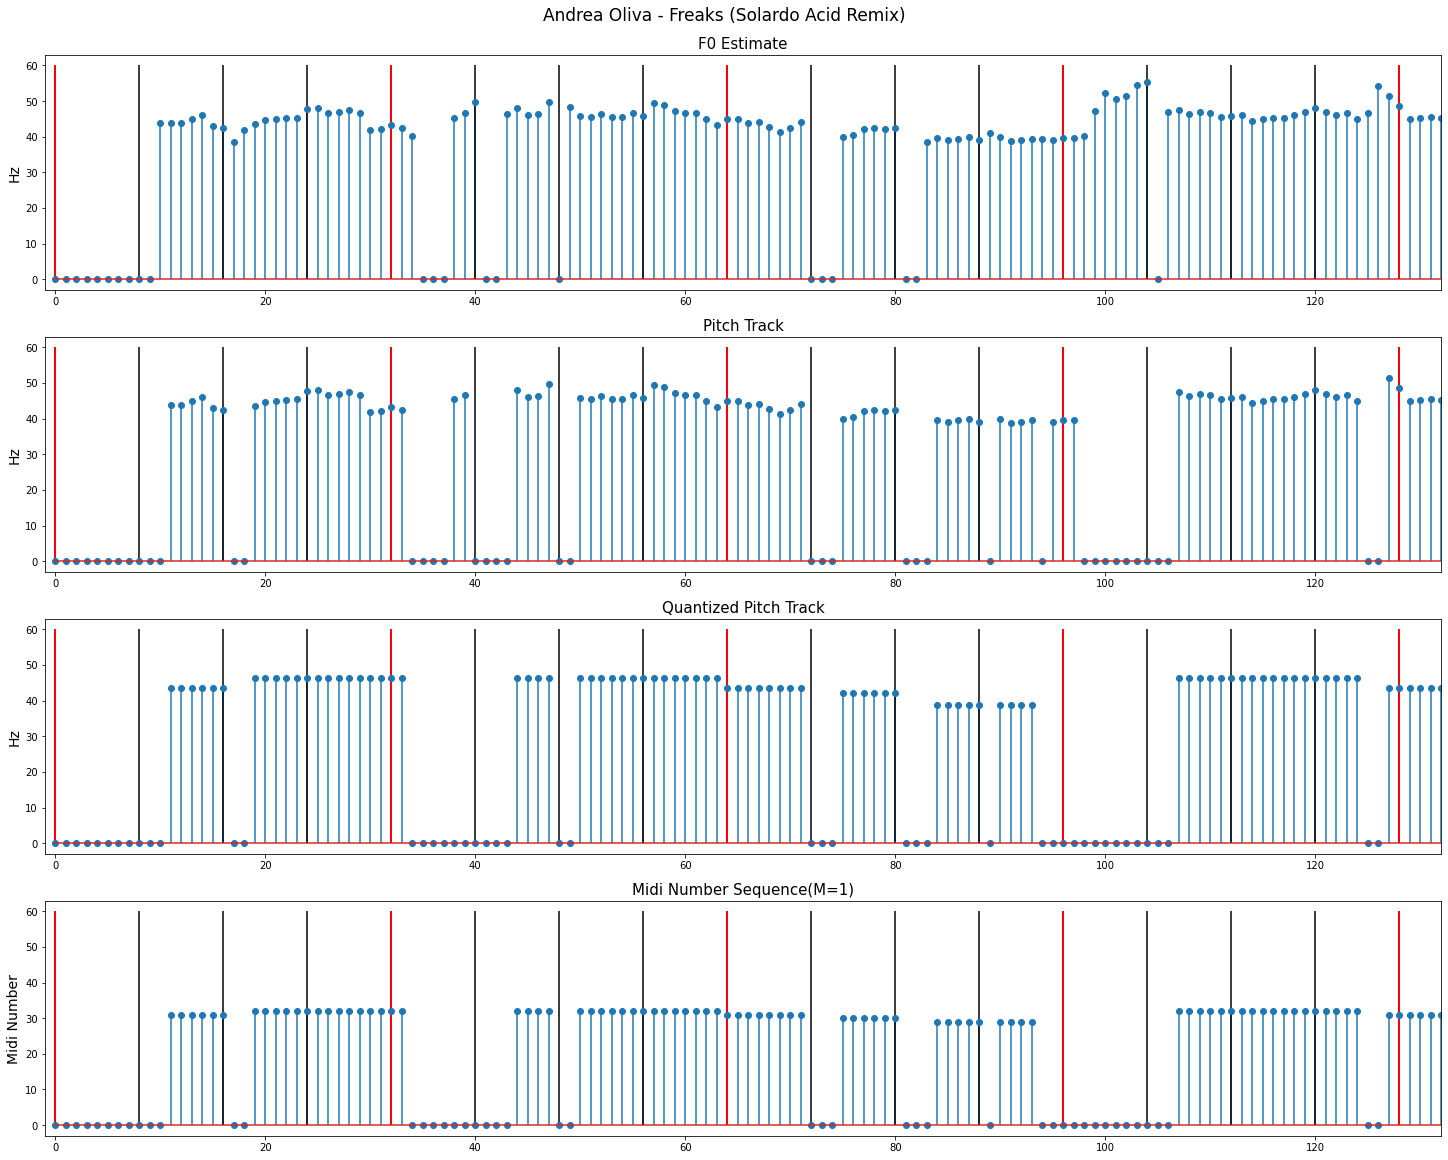

In [10]:
plot.F0_related_stem(title,F0_estimate, pitch_track, quantized_pitch_track, symbolic_representation, M)

# Spectrogram Calculation

Calculate the spectrograms of the chorus and the bassline here.

You can also apply post filtering on the spectrogram.

In [ ]:
center=True
n_fft = 4096*8

spectrogram_beat_factor = 8
win_length = int((beat_length/spectrogram_beat_factor)*fs) 
hop_length = int(win_length/4) 

bassline_spectrogram = extract_dB_spectrogram(bassline, n_fft, win_length, hop_length, center=center)

# Plots

In [ ]:
plot.spectrogram(title, directories, bassline_spectrogram, fs, hop_length, F0_estimate)

In [ ]:
plot.waveform_and_note_spectrogram(title, directories,
                                   bassline, bassline_spectrogram,
                                   fs, hop_length,
                                   bassline_notes, unk_bassline_notes,
                                   save=False)

In [ ]:
plot.note_spectrogram(title, directories,
                      bassline_spectrogram,
                      fs, hop_length,
                      bassline_notes, unk_bassline_notes)

In [ ]:
print_plot_play(chorus, fs, title)

In [ ]:
plot.note_comparison_spectrogram(title, directories,
                                 bassline_spectrogram,
                                 fs, hop_length,
                                 F0_estimate, bassline_notes,
                                 unk_bassline_notes,
                                 save=False, plot_title='')